# Lecture 26 – CSCI 3022


[Acknowledgments Page](https://ds100.org/fa23/acks/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
rng = np.random.default_rng()

In [2]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## I).  Evaluting/Comparing Linear Models

In [12]:
# Helper functions
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

def fit_least_squares(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1*x

def compute_mse(y, yhat):
    return np.mean((y - yhat)**2)

def mse_constant(theta, data):
    return np.mean(np.array([(y_obs - theta) ** 2 for y_obs in data]), axis=0)

In [4]:
plt.style.use('default') # Revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize=NO_VIZ):
    # statistics
    print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
    print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
    print(f"r = Correlation(x, y): {correlation(x, y):.3f}")
    
    # Performance metrics
    ahat, bhat = fit_least_squares(x, y)
    yhat = predict(x, ahat, bhat)
    print(f"\theta_0: {ahat:.2f}, \theta_1: {bhat:.2f}")
    print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")

    # visualization
    fig, ax_resid = None, None
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1,2,figsize=(8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        ax_resid = axs[1]
    elif visualize == RESID:
        fig = plt.figure(figsize=(4, 3))
        ax_resid = plt.gca()
    
    if ax_resid is not None:
        ax_resid.scatter(x, y - yhat, color = 'red')
        ax_resid.plot([4, 14], [0, 0], color = 'black')
        ax_resid.set_title("Residuals")
    
    return fig

Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

In [5]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

anscombe = {
    'I': pd.DataFrame(list(zip(x, y1)), columns =['x', 'y']),
    'II': pd.DataFrame(list(zip(x, y2)), columns =['x', 'y']),
    'III': pd.DataFrame(list(zip(x, y3)), columns =['x', 'y']),
    'IV': pd.DataFrame(list(zip(x4, y4)), columns =['x', 'y'])
}

In [6]:
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    x, y = ans["x"], ans["y"]
    ahat, bhat = fit_least_squares(x, y)
    print(f"Dataset {dataset}: theta_0: {ahat:.2f}, theta_1: {bhat:.2f}")

Dataset I: theta_0: 3.00, theta_1: 0.50
Dataset II: theta_0: 3.00, theta_1: 0.50
Dataset III: theta_0: 3.00, theta_1: 0.50
Dataset IV: theta_0: 3.00, theta_1: 0.50


Looks like all four datasets have exactly the same fit. 

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

In [7]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = NO_VIZ)
    print()
    print()

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118




However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

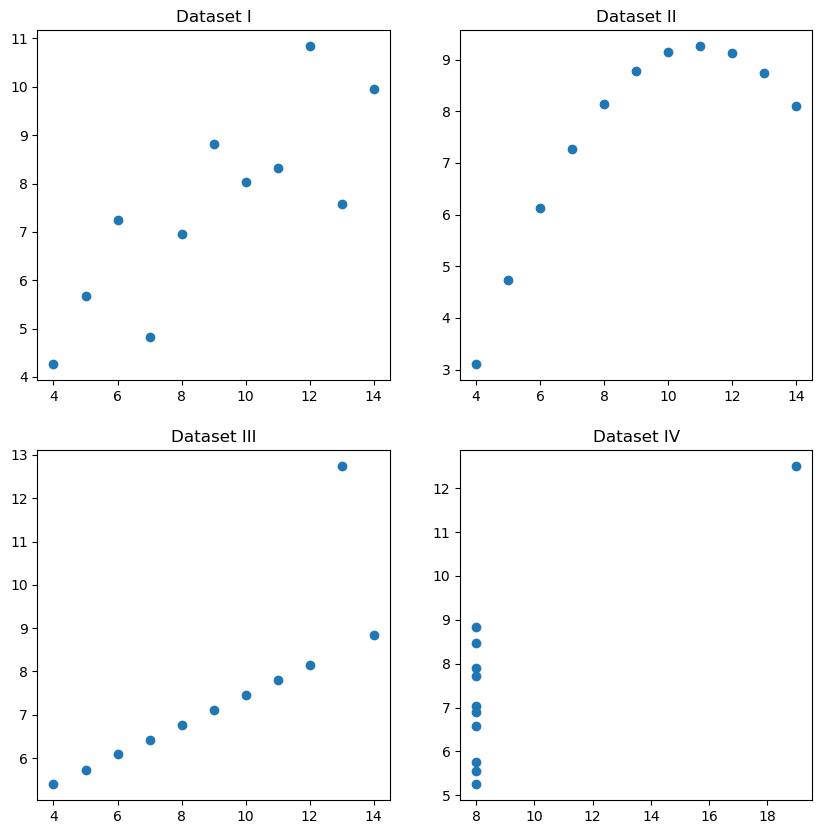

In [8]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    axs[i//2, i%2].scatter(ans['x'], ans['y'])
    axs[i//2, i%2].set_title(f"Dataset {dataset}")

plt.show()

Checking the residuals will also shed light on the differences among these four datasets.

In general the residual plot of a good regression shows no pattern.

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


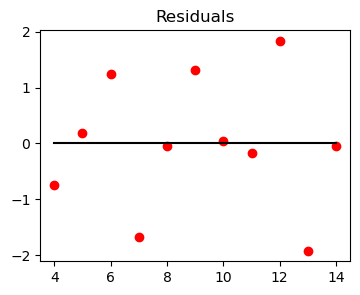



>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


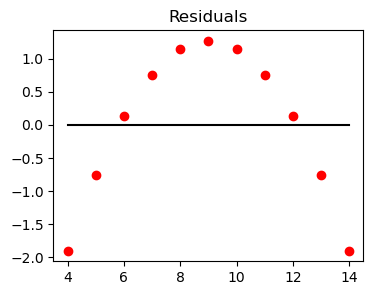



>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


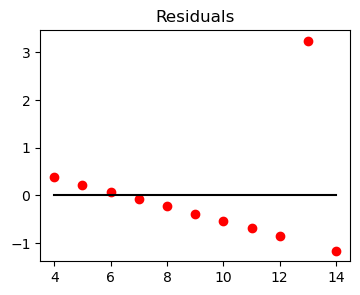



>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


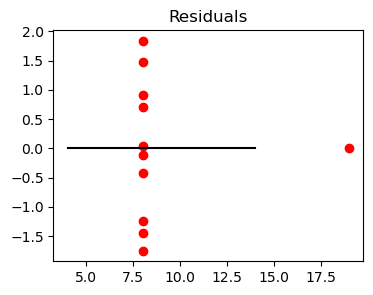

In [9]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = RESID)
    plt.show(fig)
    print()
    print()

The takeaway here is that you should always visualize your datasets before fitting any models to it!

---
<br/>



## II).  Dugongs: Comparing Two Different Models, Both Fit with MSE

In [10]:
dugongs = pd.read_csv("data/dugongs.csv")
data_constant = dugongs["Age"]
data_linear = dugongs[["Length", "Age"]]

### Loss Surfaces

### CONSTANT MODEL:  
Computes constant loss surface. As a reminder, the average loss of the constant model is

$$
\Large
\hat{R}(\theta_0) = \frac{1}{n}\sum_{i=1}^n (y_i - \theta_0)^2
$$

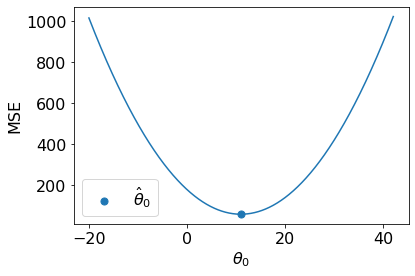

In [13]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

thetas = np.linspace(-20, 42, 1000)
l2_loss_thetas = mse_constant(thetas, data_constant)

plt.plot(thetas, l2_loss_thetas)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'MSE')

# Optimal point:  The mean:
thetahat = np.mean(data_constant)
plt.scatter([thetahat], [mse_constant(thetahat, data_constant)], s=50, label = r"$\hat{\theta}_0$")
plt.legend()
# plt.savefig('mse_constant_loss.png', bbox_inches = 'tight');
plt.show()

### Visualization of Constant Model

Here's a visualization of the prediction for the Constant Model:

In [14]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

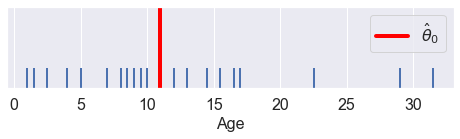

Constant Model:  Theta_0 = 10.944444444444445


In [15]:

sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.axvline(thetahat, color='red', lw=4, label=r"$\hat{\theta}_0$");
plt.legend()
plt.yticks([])
# plt.savefig('dugong_rug.png', bbox_inches = 'tight');
plt.show()
print("Constant Model:  Theta_0 =", thetahat)

### SLR MODEL:

In [16]:
theta_0_hat, theta_1_hat = fit_least_squares(xs,yobs)

print("SLR intercept is", theta_0_hat)
print("SLR slope is", theta_1_hat)

SLR intercept is -44.56682825223213
SLR slope is 23.771679029504636


## Visualizing Loss Surface
Computes 3D loss surface. As a reminder, the average loss for the SLR model is

$$
\Large
\hat{R}(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=1}^n (y_i - (\theta_0 + \theta_1x))^2
$$

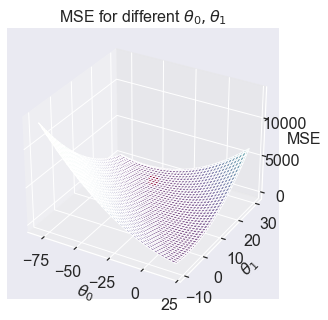

In [17]:
def mse_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([(y - (theta_0+theta_1*x)) ** 2 for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-80, 20, 80)
theta_1_values = np.linspace(-10, 30, 80)
mse_values = np.array([[mse_linear(x,y,data_linear) for x in theta_0_values] for y in theta_1_values])


# Create the 3D plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(theta_0_values, theta_1_values)
surf = ax.plot_surface(X, Y, mse_values,cmap='viridis', alpha=0.6)  # Use alpha to make it slightly transparent

# Scatter point using matplotlib
sc = ax.scatter([theta_0_hat], [theta_1_hat], [mse_linear(theta_0_hat, theta_1_hat, data_linear)],
                marker='o', color='red', s=100, label='theta hat')

# Create a colorbar
#cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
#cbar.set_label('Cost Value')

ax.set_title('MSE for different $\\theta_0, \\theta_1$')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$') 
ax.set_zlabel('MSE')

# plt.savefig('mse_linear_loss.png', bbox_inches = 'tight');
plt.show()



### Predictions

Code to plot the SLR:

In [18]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

yhats_linear = [theta_0_hat + theta_1_hat * x for x in xs]


Text(0.5, 1.0, 'Regression Line:  Age = -44.57+23.77(Length)')

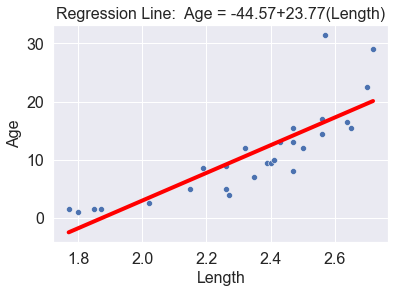

In [19]:

sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.title("Regression Line:  Age = "+str(round(theta_0_hat,2))+"+"+str(round(theta_1_hat,2))+"(Length)")




### RMSE

In [20]:
print("Least Squares Constant Model RMSE:",
          np.sqrt(mse_constant(thetahat, data_constant)))
print("Least Squares Linear Model RMSE:  ",
          np.sqrt(mse_linear(theta_0_hat, theta_1_hat, data_linear)))

Least Squares Constant Model RMSE: 7.722422059764398
Least Squares Linear Model RMSE:   4.311332860288156


Interpret the RMSE (Root Mean Square Error):
* Constant model error is HIGHER than linear model error
* Linear model is BETTER than constant model (at least for this metric)

## Calculating SLR Using Built-In Python Functions:
`Scikitlearn` (often abbreviated `sklearn`) is a popular Python library for building and fitting models. Below we walk through the general workflow for writing code for sklearn. While our examples will be focused on linear models, sklearn is highly adaptable for use on other (more complex) kinds of models. We'll see examples of this later in the semester.

In [21]:
import sklearn.linear_model as lm

# Step 1: initialize LinearRegression model
my_model = lm.LinearRegression()


# Step 2: fit the model
X = dugongs[["Length"]]  #Needs to be a dataframe, so if only have one column include 2 brackets
y = dugongs["Age"]

my_model.fit(X, y)

# Step 3: make predictions

print("The model intercept is",my_model.intercept_)
print("The model slope is:", my_model.coef_[0])

y_hat = my_model.predict(X)

print(f"The RMSE of the model is {np.sqrt(np.mean((y-y_hat)**2))}")


The model intercept is -44.56682825223209
The model slope is: 23.771679029504618
The RMSE of the model is 4.3113328602881555


Text(0.5, 1.0, 'Regression Line:  Age = -44.57+23.77(Length)')

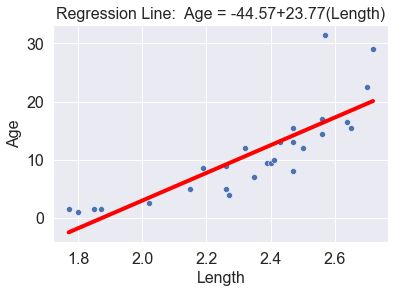

In [22]:
#Plotting Model Using output from Sklearn

xs = data_linear["Length"]     # Needed for linear predictions

yhats_linear = [my_model.intercept_ + my_model.coef_[0] * x for x in xs]

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.title("Regression Line:  Age = "+str(round(my_model.intercept_,2))+"+"+str(round(my_model.coef_[0],2))+"(Length)")




## Evaluating the Model

In [23]:
dugongs = pd.read_csv("data/dugongs.csv")
dugongs.head()

,Length,Age
0,1.77,1.5
1,1.80,1.0
2,1.85,1.5
3,1.87,1.5
4,2.02,2.5


In [24]:
yobs = dugongs["Age"]      # The true observations y
xs = dugongs["Length"]     # Needed for linear predictions

theta_1_hat = np.corrcoef(xs, yobs)[0, 1] * np.std(yobs) / np.std(xs)
theta_0_hat = np.mean(yobs) - theta_1_hat * np.mean(xs)
yhats_linear = theta_0_hat + theta_1_hat * xs

print("theta_1_hat:", theta_1_hat)
print("theta_0_hat:", theta_0_hat)

theta_1_hat: 23.771679029504636
theta_0_hat: -44.56682825223213


In [25]:
np.corrcoef(xs, yobs)[0, 1]

0.8296474554905716



The correlation coefficient is pretty high...but there's an issue.

Let's first plot the Dugong linear fit again. It doesn't look so bad if we see it here.

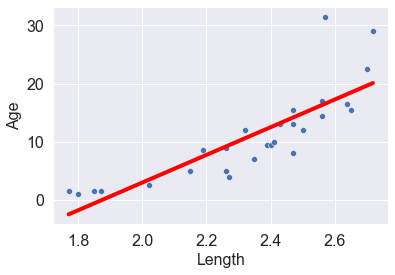

In [26]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()

## Residual Plot

Let's further inspect by plotting residuals.

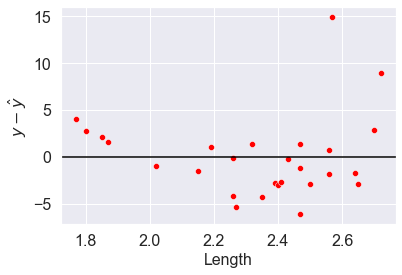

In [27]:
residuals = yobs - yhats_linear

sns.scatterplot(x=xs, y=residuals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$y - \hat{y}$")
# plt.savefig('dugong_residuals.png', bbox_inches = 'tight');
plt.show()

### Log transformation of y

We could fit a line to the linear model that relates $ z = \log(y)$ to $x$:

$$ 
\Large
\hat{z} = \theta_0 + \theta_1 x
$$

In [28]:
dugongs["Log(Age)"] = np.log(dugongs["Age"])
zobs = dugongs["Log(Age)"]      # The LOG of true observations y
xs = dugongs["Length"]     # Needed for linear predictions

ztheta_1_hat = np.corrcoef(xs, zobs)[0, 1] * np.std(zobs) / np.std(xs)
ztheta_0_hat = np.mean(zobs) - ztheta_1_hat * np.mean(xs)
zhats_linear = ztheta_0_hat + ztheta_1_hat * xs

print("slope is", ztheta_1_hat)
print("intercept is", ztheta_0_hat)

slope is 3.2579277261338033
intercept is -5.543843061000285


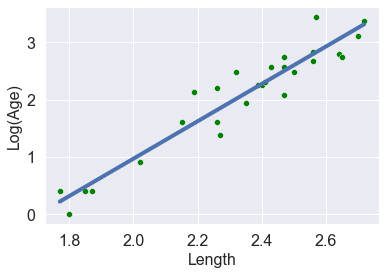

In [29]:
sns.scatterplot(x=xs, y=zobs, color='green')
plt.plot(xs, zhats_linear, lw=4)
# plt.savefig('dugong_zline.png', bbox_inches = 'tight');
plt.show()

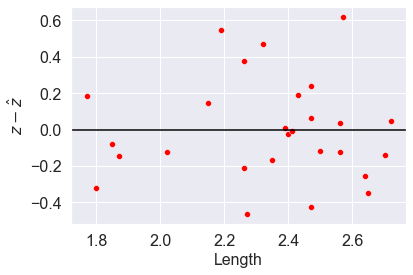

In [30]:
zresiduals = zobs - zhats_linear

sns.scatterplot(x=xs, y=zresiduals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$z - \hat{z}$")
# plt.savefig('dugong_zresiduals.png', bbox_inches = 'tight');
plt.show()

### Map back to the original coordinates

$$ 
\begin{align*}
\hat{z} &= \theta_0 + \theta_1 x\\
\widehat{\log(y)}&= \theta_0 + \theta_1 x\\
e^{\widehat{\log(y)}}&= e^{\theta_0 + \theta_1 x}\\
\hat{y}&=e^{\theta_0 + \theta_1 x}\
\end{align*}
$$

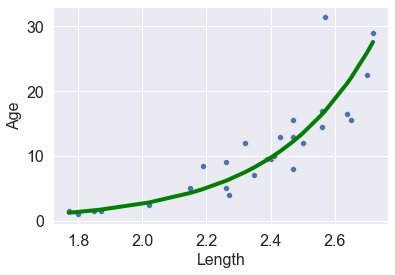

In [31]:
ypred = np.exp(zhats_linear)
sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, ypred, color='green', lw=4)
# plt.savefig('dugong_curve.png', bbox_inches = 'tight');
plt.show()

In [32]:
print(f"The RMSE of this model is {np.sqrt(np.mean((y-np.exp(zhats_linear))**2))}")

The RMSE of this model is 3.757788402753202


## Functional relations

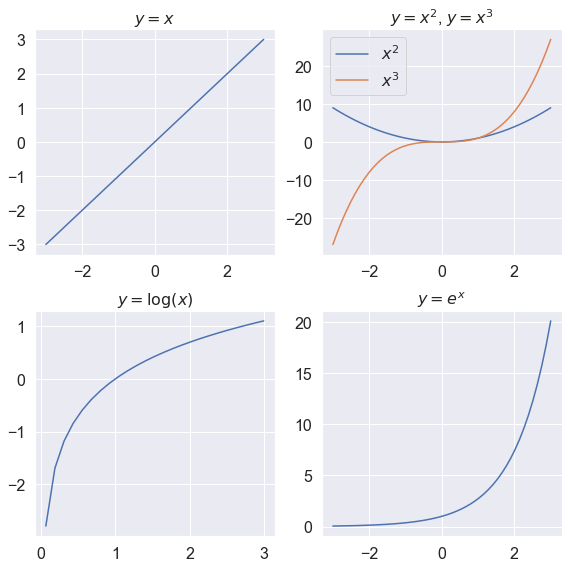

In [33]:
x = np.linspace(-3, 3)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))

# x
ax1.plot(x, x)
ax1.set_title('$y=x$')

# powers
ax2.plot(x, x**2, label='$x^2$')
ax2.plot(x, x**3, label='$x^3$')
ax2.legend()
ax2.set_title('$y=x^2$, $y=x^3$')

# log
xpos = x[x>0]  # Log is only defined for positive x
ax3.plot(xpos, np.log(xpos))
ax3.set_title(r'$y=\log(x)$')

# exp
ax4.plot(x, np.exp(x))
ax4.set_title('$y=e^x$');
plt.tight_layout();

# Transformations

<img src='bulge.png' width=350>

## A synthetic example

Let's generate data that follows $y = 2x^3 + \epsilon$, where $\epsilon$ is zero-mean noise. Note that given the functional form of $y$, if we simply draw $\epsilon \sim \mathcal{N}(0,1)$, it will be insignificant for higher values of $x$ (in the range we'll look, $[1..10]$). So we will make $\epsilon \sim x^2\mathcal{N}(0,1)$ so that the noise is present for all values of $x$ and $y$.

In [3]:
x = np.linspace(1, 10, 20)
eps = rng.normal(size=len(x))
y = (2+eps)*x**3
y = 2 * x**3 + x**2*eps

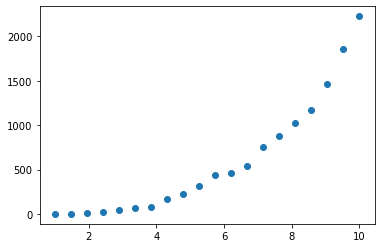

In [4]:
plt.scatter(x, y);

The bulge diagram says to raise $x$ to a power, or to take the log of $y$.

First, let's raise $x$ to a power:

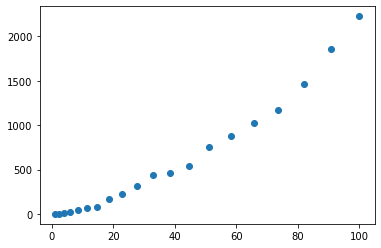

In [5]:
plt.scatter(x**2, y);

We used $x^2$ as the transformation. It's better, but still not linear.
Let's try $x^3$.

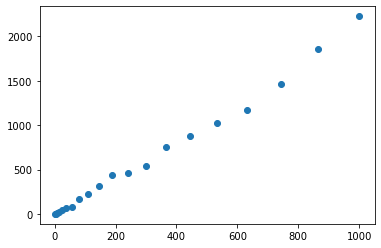

In [6]:
plt.scatter(x**3, y);




That worked well, which makes sense: the original data was cubic in $x$. We can overdo it, too: let's try $x^5$.

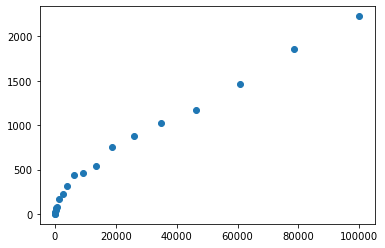

In [7]:
plt.scatter(x**5, y);

Now, the data follows some sort of square root relationship. It's certainly not linear; this goes to show that not all power transformations work the same way, and you'll need some experimentation.

Let's instead try taking the log of y from the original data.

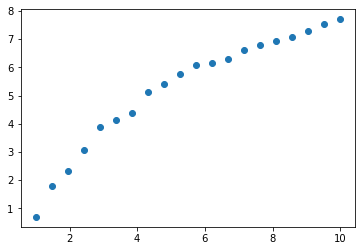

In [8]:
plt.scatter(x, np.log(y));

On it's own, this didn't quite work! Since $y = 2x^3$, $\log(y) = \log(2) + 3\log(x)$.

That means we are essentially plotting `plt.scatter(x, np.log(x))`, which is not linear.

In order for this to be linear, we need to take the log of $x$ as well:

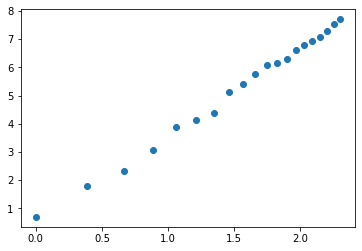

In [9]:
plt.scatter(np.log(x), np.log(y));

The relationship being visualized now is

$$\log(y) = \log(2) + 3 \log(x)$$